## Homework 1

Let's utilize `pandas` to manipulate the 2017 Bloomington weather data set.

### Task 1

Use pd.read_csv() to load the data file into a DataFrame. What is the average and standard deviation for the daily high temperature?



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_weather = pd.read_csv('data/2017-weather.csv')

### Task 2

Convert the column `Data` into Python datetime objects. Now create a new column called `Month` containing the month abbreviation text.


In [5]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather.index = df_weather['Date']

### Task 3

Use a pandas expression to substitute a rainfall amount of 0.05 inches whenever there is a "T" in the "Precip" column. Show that the `Precip` column now contains all floating-point values.


In [6]:
df_weather.loc[df_weather['Precip'] == 'T', 'Precip'] = '0.05'
df_weather['Precip'] = pd.to_numeric(df_weather['Precip'])
df_weather['Precip']

Date
2017-01-01    0.00
2017-01-02    0.33
2017-01-03    0.36
2017-01-04    0.00
2017-01-05    0.03
              ... 
2017-12-27    0.00
2017-12-28    0.00
2017-12-29    0.02
2017-12-30    0.05
2017-12-31    0.00
Name: Precip, Length: 365, dtype: float64

### Task 4

Use your own functions (from previous work) or `lambda` expressions with the `apply` method to create a column "HDD" containing the daily number of heating degree-days and a column "CDD" containing the daily number of cooling degree days. Recall the definition of heating and cooling "degree-days" from the previous assignments.


In [19]:
#Heating, 0 if >65, use if then else

HDD = lambda row: (65 - row ['AvgT']) if (row['AvgT']) < 65 else 0
df_weather['HDD']=df_weather.apply(HDD,axis = 1)
CDD = lambda row: (row['AvgT'] - 65) if (row['AvgT']) > 65 else 0
df_weather['CDD'] = df_weather.apply(CDD,axis = 1)
df_weather


,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes,HDD,CDD
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017-01-01,46,35,24,38,29,20,89,77,58,...,10,9,4,9,4,-,0.00,NaN,30,0
2017-01-02,2017-01-02,54,48,41,52,46,38,97,91,77,...,10,3,0,10,5,-,0.33,"Fog , Rain",17,0
2017-01-03,2017-01-03,54,45,34,54,48,31,100,92,86,...,10,3,0,17,4,26,0.36,"Fog , Rain",20,0
2017-01-04,2017-01-04,30,24,19,28,14,10,89,68,57,...,10,10,7,15,11,24,0.00,NaN,41,0
2017-01-05,2017-01-05,19,14,8,14,10,2,84,76,60,...,10,4,0,9,5,-,0.03,Snow,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,13,6,-2,-5,-7,-9,79,63,46,...,10,10,10,14,6,16,0.00,NaN,59,0
2017-12-28,2017-12-28,21,13,4,7,1,-5,69,55,41,...,10,10,10,13,5,16,0.00,NaN,52,0
2017-12-29,2017-12-29,22,20,17,16,12,7,84,70,56,...,10,8,0,12,4,17,0.02,Snow,45,0


### Task 5

Make two bar charts, one showing the monthly total of heating degree-days and the other showing the monthly number of cooling degree-days.

array([<Axes: title={'center': 'CDD'}, xlabel='Month'>,
       <Axes: title={'center': 'HDD'}, xlabel='Month'>], dtype=object)

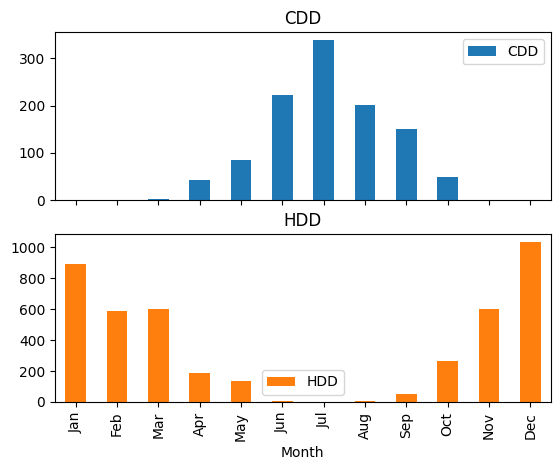

In [147]:
df_weather['Month'] = df_weather['Date'].dt.strftime('%b')

monthly = pd.DataFrame({'CDD':df_weather['CDD'].groupby(df_weather['Month'],sort=False).sum(),
                        'HDD':df_weather['HDD'].groupby(df_weather['Month'],sort=False).sum(),
                        })
monthly
monthly.plot.bar(y=['CDD','HDD'],subplots = True)

### Task 6

In 2017, how many days were there when the daily high temperature was 75 degrees Fahrenheit or higher?


In [60]:
hightemp = df_weather['HighT'] >= 75
filterdf_weather = df_weather.loc[(df_weather['Date'].dt.year == 2017) & hightemp]

hightempdays2017 = len(filterdf_weather)
hightempdays2017

154

### Task 7

Now, solve Task 6 but find the number of days **in each month** when the high temperature was 75 degrees Fahrenheit or higher.


In [46]:
hightemp = df_weather['HighT'] >= 75

monthly = pd.DataFrame({'High Temp Days':hightemp.groupby(df_weather['Month'], sort=False).sum()     
                        })
monthly

,High Temp Days
Month,
Jan,0
Feb,0
Mar,2
Apr,13
May,16
Jun,29
Jul,31
Aug,30
Sep,22


### Task 8

How many days in 2017 reported that foggy conditions had occurred? How many had snow?



In [153]:
df_weather['fog'] = df_weather['Notes'].apply(lambda x: x if x == 'Fog' else None)

df_weather['snow'] = df_weather['Notes'].apply(lambda x: x if x == 'Snow' else None)

print(f"There were {df_weather['fog'].count()} foggy days and {df_weather['snow'].count()} snowy days in 2017")

#Not sure why but no matter what I try, it returns 365 and 0

There were 365 foggy days and 0 snowy days in 2017


### Task 9 (extra credit)

Re-work your solution for Task 5 to make one plot that has bars for heating and cooling degree-days on the same axes. You'll find some exaples at [this site](https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/).

<Axes: xlabel='Month'>

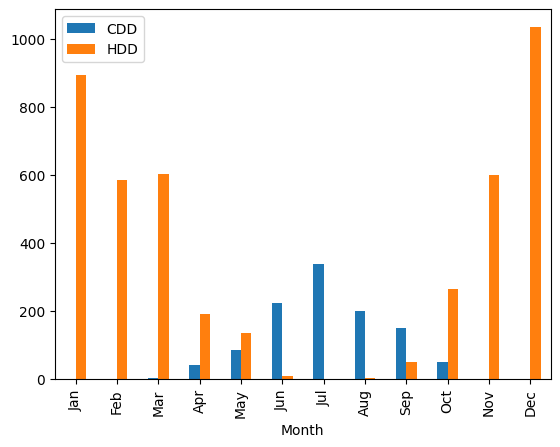

In [148]:
monthly.plot.bar(y=['CDD','HDD'],subplots = False)